In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0,'../..')
import omama as O
import pickle
from hyperopt import hp, rand, fmin, Trials
from pyod.models.vae import VAE

2023-03-21 19:29:15.136212: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
# load data and labels

with open('/raid/mpsych/datasetCSTAR.pkl','rb') as f:
    datasetCSTAR = pickle.load(f)
    
with open('/raid/mpsych/datasetCSTAR_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [4]:
print(len(datasetCSTAR), len(labels))

1000 1000


In [10]:
from keras.losses import mse, binary_crossentropy, kullback_leibler_divergence

param_grid = {
    'contamination': hp.uniform('contamination', 0.001, .2),
    'encoder_neurons': hp.choice('encoder_neurons', [[32, 16, 8], [64, 32, 16],
                                                    [128, 64, 32]]),
    'decoder_neurons': hp.choice('decoder_neurons', [[8, 16, 32], [16, 32, 64],
                                                    [32, 64, 128]]),
    'latent_dim': hp.choice('latent_dim', [2, 4, 8, 16, 32]),
    'hidden_activation': hp.choice('hidden_activation', ['relu', 'tanh']),
    'output_activation': hp.choice('output_activation', ['sigmoid', 'tanh']),
#     'loss': hp.choice('loss', [mse, binary_crossentropy,
#                                  kullback_leibler_divergence]),
    'optimizer': hp.choice('optimizer', ['adam', 'rmsprop']),
    'epochs': hp.choice('epochs', [50, 75, 100, 150, 200]),
    'batch_size': hp.choice('batch_size', [32, 64, 128, 256, 512]),
    'dropout_rate': hp.uniform('dropout_rate', 0.0, 0.5),
    'l2_regularizer': hp.uniform('l2_regularizer', 0.0, 0.5),
    'validation_size': hp.uniform('validation_size', 0.1, 0.5),
    'preprocessing': hp.choice('preprocessing', [True, False]),
    'gamma': hp.uniform('gamma', 0.001, 0.1),
    'random_state': hp.choice('random_state', [0, 42, 2018, 2019]),
    'capacity': hp.uniform('capacity', 0.001, 0.1),
    'verbose': hp.choice('verbose', [0, 0, 0]),
}

In [11]:
hyperOpt = O.HyperTuner(
    algorithm=VAE,
    param_space=param_grid,
    feature_type='hist',
    norm_type='minmax',
    data=datasetCSTAR,
    gt_labels=labels,
    max_evals=30,
    timing=True,
    supress_tensor_flow_output=True
)

HyperTuner initializing, please be patient...
HyperTuner init time: 41.6760 seconds
HyperTuner init memory: 68401304
 MB


Supressing Tensor Flow output...
HyperTuner optimizing, please be patient...
 37%|█████████████████████████████████████████████████▏                                                                                    | 11/30 [05:54<11:32, 36.46s/trial, best loss: -0.9662499999999999]

job exception: Input contains NaN, infinity or a value too large for dtype('float32').



 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 22/30 [05:54<04:51, 36.48s/trial, best loss: -0.9662499999999999]

job exception: Input contains NaN, infinity or a value too large for dtype('float32').



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [04:05<00:00, 30.70s/trial, best loss: -0.9662499999999999]
Best parameters:
batch_size: 0.0
capacity: 0.06131767922552495
contamination: 0.015414562231089293
decoder_neurons: 2.0
dropout_rate: 0.42865805527000883
encoder_neurons: 2.0
epochs: 2.0
gamma: 0.04668196456317853
hidden_activation: tanh
l2_regularizer: 0.4532703965079503
latent_dim: 3.0
optimizer: rmsprop
output_activation: sigmoid
preprocessing: False
random_state: 3.0
validation_size: 0.16440964344699366
verbose: 2.0


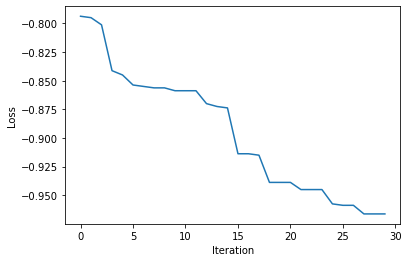

In [12]:
hyperOpt.optimize()

In [13]:
hyperOpt.display_best_params()

Best parameters:
batch_size: 0.0
capacity: 0.06131767922552495
contamination: 0.015414562231089293
decoder_neurons: 2.0
dropout_rate: 0.42865805527000883
encoder_neurons: 2.0
epochs: 2.0
gamma: 0.04668196456317853
hidden_activation: tanh
l2_regularizer: 0.4532703965079503
latent_dim: 3.0
optimizer: rmsprop
output_activation: sigmoid
preprocessing: False
random_state: 3.0
validation_size: 0.16440964344699366
verbose: 2.0


In [14]:
hyperOpt.

{'batch_size': 0,
 'capacity': 0.06131767922552495,
 'contamination': 0.015414562231089293,
 'decoder_neurons': 2,
 'dropout_rate': 0.42865805527000883,
 'encoder_neurons': 2,
 'epochs': 2,
 'gamma': 0.04668196456317853,
 'hidden_activation': 1,
 'l2_regularizer': 0.4532703965079503,
 'latent_dim': 3,
 'optimizer': 1,
 'output_activation': 0,
 'preprocessing': 1,
 'random_state': 3,
 'validation_size': 0.16440964344699366,
 'verbose': 2}

Supressing Tensor Flow output...
HyperTuner optimizing, please be patient...
  0%|                                                                                                                                                                  | 0/30 [00:00<?, ?trial/s, best loss=?]

2023-03-21 19:30:05.013318: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-03-21 19:30:05.041355: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-21 19:30:05.041376: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: chimera12
2023-03-21 19:30:05.041381: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: chimera12
2023-03-21 19:30:05.041472: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 450.172.1
2023-03-21 19:30:05.041489: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 450.172.1
2023-03-21 19:30:05.041494: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 450.172.1
2023-03-21 19:30:05.042015: I tensorflow/core/platform/cpu_fe

 37%|█████████████████████████████████████████████████████▌                                                                                            | 11/30 [05:55<10:30, 33.17s/trial, best loss: -0.9275]

job exception: Input contains NaN, infinity or a value too large for dtype('float32').



 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 22/30 [05:55<04:26, 33.26s/trial, best loss: -0.9275]

job exception: Input contains NaN, infinity or a value too large for dtype('float32').



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [04:21<00:00, 32.73s/trial, best loss: -0.9275]
Best parameters:
batch_size: 3.0
capacity: 0.019045994835145314
contamination: 0.051232178093530756
dropout_rate: 0.29176580122341905
epochs: 2.0
gamma: 0.021388175613821923
hidden_activation: tanh
l2_regularizer: 0.036958272662759584
latent_dim: 3.0
optimizer: adam
output_activation: tanh
preprocessing: False
random_state: 1.0
validation_size: 0.1848868467973341
verbose: 1.0


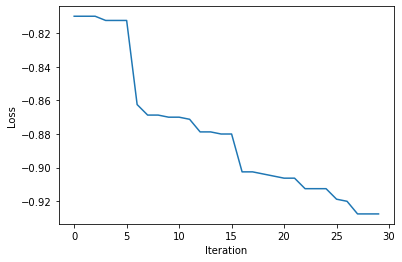

In [7]:
hyperOpt.optimize()

In [8]:
hyperOpt.display_best_params()

Best parameters:
batch_size: 3.0
capacity: 0.019045994835145314
contamination: 0.051232178093530756
dropout_rate: 0.29176580122341905
epochs: 2.0
gamma: 0.021388175613821923
hidden_activation: tanh
l2_regularizer: 0.036958272662759584
latent_dim: 3.0
optimizer: adam
output_activation: tanh
preprocessing: False
random_state: 1.0
validation_size: 0.1848868467973341
verbose: 1.0


In [9]:
hyperOpt.print_param_space()

Parameter space:
contamination: ['0.001', '0.2']
latent_dim: ['5', '2', '4', '8', '16', '32']
hidden_activation: ['relu', 'tanh']
output_activation: ['sigmoid', 'tanh']
optimizer: ['adam', 'rmsprop']
epochs: ['5', '50', '75', '100', '150', '200']
batch_size: ['5', '32', '64', '128', '256', '512']
dropout_rate: ['0.0', '0.5']
l2_regularizer: ['0.0', '0.5']
validation_size: ['0.1', '0.5']
preprocessing: ['True', 'False']
gamma: ['0.001', '0.1']
random_state: ['4', '0', '42', '2018', '2019']
capacity: ['0.001', '0.1']
verbose: ['3', '0', '0', '0']
